<a href="https://colab.research.google.com/github/Rosemary-99/Taller-1-/blob/main/Ajustes_data_frame_para_exportar_c%C3%B3digo_parte_1_taller_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas-profiling --upgrade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
#from ydata_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Track_mod

## Importación

In [ ]:
track_df = pd.read_csv('/content/drive/MyDrive/Spotify/tracks_mod.csv')

In [ ]:
track_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0.0,-13.338,1.0,0.4510,0.674,0.744000,0.1510,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0.0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0.0,-22.136,1.0,0.9570,0.797,0.000000,0.1480,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,1.0,-21.180,1.0,0.0512,0.994,0.021800,0.2120,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,NaN,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,NaN,7.0,-27.961,1.0,0.0504,0.995,0.918000,0.1040,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.158,3.0,-16.900,0.0,0.0390,0.989,0.130000,0.3110,0.196,103.220,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50.0,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0.0,-7.471,0.0,0.0292,0.785,0.000000,0.0648,0.211,131.896,4.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72.0,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0.0,-5.223,1.0,0.0652,0.141,0.000297,0.0924,0.686,150.091,4.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70.0,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7.0,-12.823,0.0,0.0408,0.895,0.000150,0.0874,NaN,145.095,4.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58.0,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10.0,-6.212,1.0,0.0345,0.206,0.000003,0.3050,0.438,90.029,4.0


In [ ]:
track_df.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object

## Descripción general

In [ ]:
track_df.shape

(586672, 20)

In [ ]:
track_df.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object

Descripción de columnas:

* id: -
* name: -
* popularity: The popularity of the album. The value will be between 0 and 100, with 100 being the most popular.
* duration_ms: The track length in milliseconds.
* explicit: Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown)
* artists: The artists who performed the track. Each artist object includes a link in href to more detailed information about the artist.
* id_artists: -
* release_date: The date the album was first released.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

In [ ]:
track_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,555128.000000,5.866720e+05,586672.000000,564477.000000,564246.000000,564114.000000,564238.000000,564406.000000,564216.000000,564055.000000,564202.000000,564394.000000,564324.000000,564318.000000,564322.000000
mean,27.564493,2.300512e+05,0.027571,0.563608,0.542160,5.222037,-10.206486,0.658609,0.104757,0.449750,0.113352,0.213931,0.552261,118.457192,3.873484
std,18.371158,1.265261e+05,0.241849,0.166092,0.251872,3.519683,5.089432,0.474177,0.179644,0.348881,0.266767,0.184336,0.257680,29.765675,0.472978
min,0.000000,3.344000e+03,-1.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.890000,0.000000,0.034000,0.096700,0.000000,0.098300,0.346000,95.594000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.375000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.483000,1.000000,0.076300,0.784000,0.009530,0.278000,0.769000,136.317000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


<AxesSubplot:>

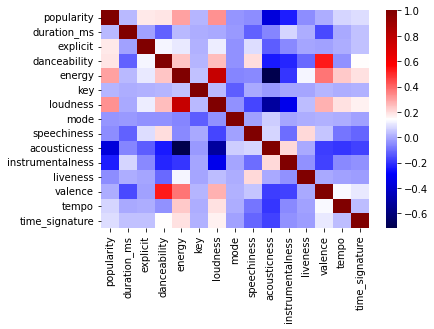

In [ ]:
sns.heatmap(track_df.corr(), cmap='seismic')

In [ ]:
correlacion = track_df.corr()
relevant = {}
for col in correlacion:
  # Nombre de la columna: col
  for row in correlacion[col]:
    # valor de la fila
    if (row != 1.0) and (row > 0.5 or row < -0.5):
      relevant[col] = track_df[col].dtype

In [ ]:
relevant

{'danceability': dtype('float64'),
 'energy': dtype('float64'),
 'loudness': dtype('float64'),
 'acousticness': dtype('float64'),
 'valence': dtype('float64')}

Correlaciones

* Valence vs danceability: positiva
* acousticness vs energy: negativa
* energy vs valence: positiva
* energy vs popularity: positiva

## Análisis de calidad de datos y procesos de limpieza implementado

In [ ]:
track_df.isnull().sum()

id                      0
name                   71
popularity          31544
duration_ms             0
explicit                0
artists                 0
id_artists              0
release_date            0
danceability        22195
energy              22426
key                 22558
loudness            22434
mode                22266
speechiness         22456
acousticness        22617
instrumentalness    22470
liveness            22278
valence             22348
tempo               22354
time_signature      22350
dtype: int64

In [ ]:
track_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,555128.000000,5.866720e+05,586672.000000,564477.000000,564246.000000,564114.000000,564238.000000,564406.000000,564216.000000,564055.000000,564202.000000,564394.000000,564324.000000,564318.000000,564322.000000
mean,27.564493,2.300512e+05,0.027571,0.563608,0.542160,5.222037,-10.206486,0.658609,0.104757,0.449750,0.113352,0.213931,0.552261,118.457192,3.873484
std,18.371158,1.265261e+05,0.241849,0.166092,0.251872,3.519683,5.089432,0.474177,0.179644,0.348881,0.266767,0.184336,0.257680,29.765675,0.472978
min,0.000000,3.344000e+03,-1.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.890000,0.000000,0.034000,0.096700,0.000000,0.098300,0.346000,95.594000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.375000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.483000,1.000000,0.076300,0.784000,0.009530,0.278000,0.769000,136.317000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [ ]:
categoricas = list(filter(lambda x: track_df[x].dtype=="object", track_df.columns))
categoricas

['id', 'name', 'artists', 'id_artists', 'release_date']

In [ ]:
cat_df = track_df[categoricas]
cat_df.head()

,id,name,artists,id_artists,release_date
0,35iwgR4jXetI318WEWsa1Q,Carve,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922


Limpieza realease_date

YYYY-MM-DD

In [ ]:
date_malformed = track_df.loc[track_df['release_date'].apply(lambda x: (re.match('\d{4}-\d{2}-\d{2}', x) is None))]

In [ ]:
date_malformed.shape

(138594, 20)

In [ ]:
date_malformed.sample(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8251,460OLdgNCMd8xdaMZYHrZw,"What a Night, What a Moon, What a Girl (with T...",13.0,175840,0,"['Billie Holiday', 'Teddy Wilson']","['1YzCsTRb22dQkh9lghPIrp', '0tg5uVI4VjzZOFzBry...",1933,0.768,0.430,7.0,-11.055,0.0,0.0447,0.805,0.045800,0.219,0.957,113.136,4.0
150797,7mdygXWc4Rl4u2vnCj2h03,Luna Negra,26.0,284467,0,['Rey Ruiz'],['1S0uvW1rgvtkNGma9su3fJ'],1992,0.690,0.694,5.0,-6.467,1.0,0.0366,0.566,0.000009,0.062,0.900,173.978,4.0
136272,4NUu82CgyrktXZbKLIcorB,"Don't Cry, Sweetheart",0.0,160884,0,['Russ Morgan'],['4p2WNjwHrHBUD9XJBmbf7H'],1944,0.258,0.531,7.0,-5.743,1.0,0.0339,NaN,0.919000,NaN,0.410,129.013,4.0


In [ ]:
date_malformed['release_date'].unique()

array(['1922', '1923', 'Year 1923', '1924', '1925', '1926', '1927',
       '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935',
       '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943',
       '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956-03', '1956', '1956-04',
       '1957-03', '1957', '1957-06', '1957-09', '1957-11', '1958',
       '1958-04', '1958-06', '1958-01', '1958-11', '1959', '1959-07',
       '1960', '1960-02', '1960-07', '1960-10', '1960-03', '1960-08',
       '1960-01', '1961', '1961-03', '1961-10', '1961-02', '1961-07',
       '1961-12', '1962', '1962-04', '1962-07', '1962-11', '1962-03',
       '1962-02', '1962-10', '1963-02', '1963', '1963-07', '1963-08',
       '1963-09', '1963-10', '1963-05', '1964', '1964-08', '1964-10',
       '1964-06', '1964-09', '1964-11', '1964-04', '1965', '1965-11',
       '1965-08', '1965-03', '1965-12', '1965-02', '1965-05', '1968',
       '1966-03', '1966

Se omitirá el valor de string year

In [ ]:
def extract_year(x):
  year = None
  if "Year" in x:
    x = x.replace("Year", "")
    x = x.strip()
    year = x
  else:
    year = x
  
  return year

extract_year("Year 2020")

'2020'

In [ ]:
pd.to_datetime(date_malformed['release_date'].apply(extract_year))

4        1922-01-01
5        1922-01-01
6        1922-01-01
7        1922-01-01
8        1922-01-01
            ...    
586437   2009-01-01
586473   2011-01-01
586499   2013-01-01
586553   2015-01-01
586664   2020-01-01
Name: release_date, Length: 138594, dtype: datetime64[ns]

In [ ]:
track_df['release_date'] = track_df["release_date"].apply(extract_year)

In [ ]:
track_df['release_date'] = pd.to_datetime(track_df['release_date'])

In [ ]:
track_df['release_date'].dtype

dtype('<M8[ns]')

In [ ]:
track_df.dtypes

id                          object
name                        object
popularity                 float64
duration_ms                  int64
explicit                     int64
artists                     object
id_artists                  object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                        float64
loudness                   float64
mode                       float64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature             float64
dtype: object

## Analisis exploratorio de datos

### Univariados

Descripción de columnas:

* id: -
* name: -
* popularity: The popularity of the album. The value will be between 0 and 100, with 100 being the most popular.
* duration_ms: The track length in milliseconds.
* explicit: Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown)
* artists: The artists who performed the track. Each artist object includes a link in href to more detailed information about the artist.
* id_artists: -
* release_date: The date the album was first released.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

In [ ]:
#profile = ProfileReport(track_df)

In [ ]:
#profile.to_notebook_iframe()

In [ ]:
track_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,555128.000000,5.866720e+05,586672.000000,564477.000000,564246.000000,564114.000000,564238.000000,564406.000000,564216.000000,564055.000000,564202.000000,564394.000000,564324.000000,564318.000000,564322.000000
mean,27.564493,2.300512e+05,0.027571,0.563608,0.542160,5.222037,-10.206486,0.658609,0.104757,0.449750,0.113352,0.213931,0.552261,118.457192,3.873484
std,18.371158,1.265261e+05,0.241849,0.166092,0.251872,3.519683,5.089432,0.474177,0.179644,0.348881,0.266767,0.184336,0.257680,29.765675,0.472978
min,0.000000,3.344000e+03,-1.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.890000,0.000000,0.034000,0.096700,0.000000,0.098300,0.346000,95.594000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.375000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.483000,1.000000,0.076300,0.784000,0.009530,0.278000,0.769000,136.317000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [ ]:
categoricas = list(filter(lambda x: track_df[x].dtype=="object", track_df.columns))
numericas = list(filter(lambda x: track_df[x].dtype!="object" and track_df[x].dtype!="datetime64[ns]", track_df.columns))

In [ ]:
numericas

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
track_df[numericas].mean()

popularity              27.564493
duration_ms         230051.167286
explicit                 0.027571
danceability             0.563608
energy                   0.542160
key                      5.222037
loudness               -10.206486
mode                     0.658609
speechiness              0.104757
acousticness             0.449750
instrumentalness         0.113352
liveness                 0.213931
valence                  0.552261
tempo                  118.457192
time_signature           3.873484
dtype: float64

<Figure size 3600x3600 with 0 Axes>

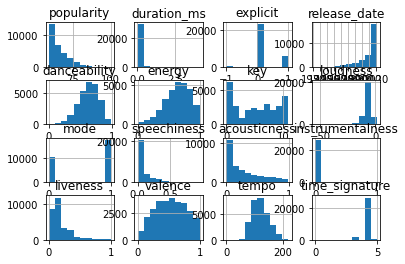

In [ ]:
most_popular = track_df[track_df["popularity"] >= track_df["popularity"].quantile(0.95)]
plt.figure(figsize = (50, 50))
most_popular.hist()
plt.show()

### Bivariado

Correlaciones

* Valence vs danceability: positiva
* acousticness vs energy: negativa
* energy vs valence: positiva
* energy vs popularity: positiva

<AxesSubplot:>

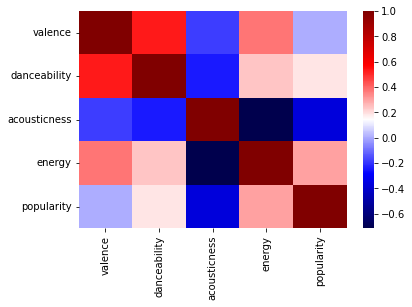

In [ ]:
sns.heatmap(track_df[['valence','danceability', 'acousticness', 'energy','popularity']].corr(), cmap='seismic')

In [ ]:
pop_max = track_df["popularity"].max()
track_df[track_df["popularity"] == pop_max]["name"]

93802    Peaches (feat. Daniel Caesar & Giveon)
Name: name, dtype: object

In [ ]:
most_popular = track_df[track_df["popularity"] >= track_df["popularity"].quantile(0.95)]

In [ ]:
the_best = most_popular.sort_values('popularity', ascending=False).iloc[0:5]
the_best

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100.0,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0.0,-6.181,1.0,0.1190,0.3210,0.000000,0.420,0.464,90.030,4.0
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99.0,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10.0,-8.761,1.0,0.0601,NaN,0.000013,0.105,0.132,143.874,4.0
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98.0,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4.0,-6.865,0.0,0.0913,0.1750,0.000000,0.150,0.472,149.996,NaN
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97.0,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,NaN,0.826,0.0,-5.487,1.0,0.0309,0.0212,0.000012,0.543,0.644,118.051,4.0
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97.0,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11.0,-9.016,0.0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4.0


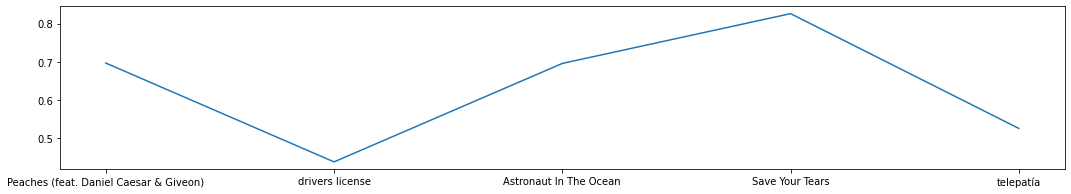

In [ ]:
plt.figure(figsize = (18, 3))
plt.plot(the_best["name"], the_best["energy"])

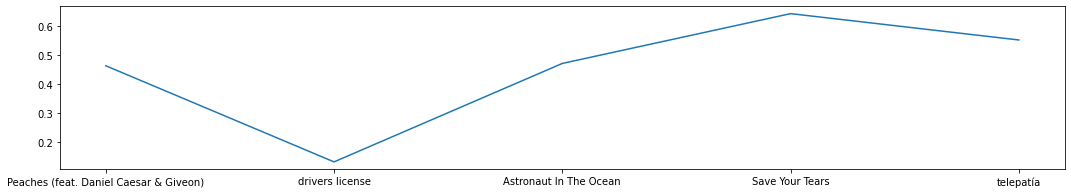

In [ ]:
plt.figure(figsize = (18, 3))
plt.plot(the_best["name"], the_best["valence"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4595f17670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4595f175b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4595f175e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f458964c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f458964c490>],
 'means': []}

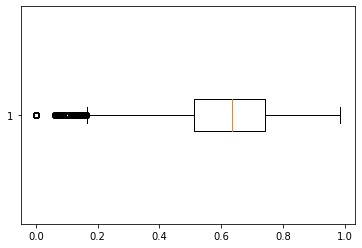

In [ ]:
plt.boxplot(most_popular['danceability'].fillna(0), vert=False)

In [ ]:
track_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0.0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,NaN,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,NaN,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.158,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [ ]:
track_df["artists"] = track_df["artists"].str.replace("'", "")
track_df["artists"] = track_df["artists"].str.replace("[","")
track_df["artists"] = track_df["artists"].str.replace("]","")
track_df["artists"]

<ipython-input-35-64be8a562159>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  track_df["artists"] = track_df["artists"].str.replace("[","")
<ipython-input-35-64be8a562159>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  track_df["artists"] = track_df["artists"].str.replace("]","")


0                               Uli
1                   Fernando Pessoa
2                   Ignacio Corsini
3                   Ignacio Corsini
4                       Dick Haymes
                    ...            
586667                      阿YueYue
586668                   ROLE MODEL
586669                      FINNEAS
586670    Gentle Bones, Clara Benin
586671                    Afrosound
Name: artists, Length: 586672, dtype: object

In [ ]:
track_df["id_artists"] = track_df["id_artists"].str.replace("'", "")
track_df["id_artists"] = track_df["id_artists"].str.replace("[","")
track_df["id_artists"] = track_df["id_artists"].str.replace("]","")
track_df["id_artists"]

<ipython-input-37-5fe29368e517>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  track_df["id_artists"] = track_df["id_artists"].str.replace("[","")
<ipython-input-37-5fe29368e517>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  track_df["id_artists"] = track_df["id_artists"].str.replace("]","")


0                                 45tIt06XoI0Iio4LBEVpls
1                                 14jtPCOoNZwquk5wd9DxrY
2                                 5LiOoJbxVSAMkBS2fUm3X2
3                                 5LiOoJbxVSAMkBS2fUm3X2
4                                 3BiJGZsyX9sJchTqcSA7Su
                               ...                      
586667                            1QLBXKM5GCpyQQSVMNZqrZ
586668                            1dy5WNgIKQU6ezkpZs4y8z
586669                            37M5pPGs6V1fchFJSgCguX
586670    4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn
586671                            0i4Qda0k4nf7jnNHmSNpYv
Name: id_artists, Length: 586672, dtype: object

In [ ]:
track_df.to_csv('normal_track3.csv', index=False)

In [ ]:
str(track_df.iloc()[0].to_dict()).replace("'",'"')

'{"id": "35iwgR4jXetI318WEWsa1Q", "name": "Carve", "popularity": 6.0, "duration_ms": 126903, "explicit": 0, "artists": "["Uli"]", "id_artists": "["45tIt06XoI0Iio4LBEVpls"]", "release_date": Timestamp("1922-02-22 00:00:00"), "danceability": 0.645, "energy": 0.445, "key": 0.0, "loudness": -13.338, "mode": 1.0, "speechiness": 0.451, "acousticness": 0.674, "instrumentalness": 0.744, "liveness": 0.151, "valence": 0.127, "tempo": 104.851, "time_signature": 3.0}'

In [ ]:
track_df["id_artists"].str.contains("1uNFoZAHBGtllmzznpCI3s").any()

True

# Artist_mod

In [ ]:
artist_df = pd.read_csv('/content/drive/MyDrive/Spotify/artists_mod.csv')

## Descripción general

In [ ]:
artist_df.shape

(1162095, 5)

In [ ]:
artist_df[artist_df["name"]=="Justin Bieber"]

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100


In [ ]:
artist_df.sample(5)

,id,followers,genres,name,popularity
173557,5tQCDrwslI4nnBQUZ74DM9,75.0,[],Iconic,6
1054843,0s56jPTjHaOPgAhvqRCxNN,8.0,[],Nex Millen/Retrospective,0
195597,0xZx3tHU9i2rtUfmxOKlNJ,3.0,[],Ian Brown/Christopher van Kampen,0
450623,7wxzhKwKi4sks4KpId7kOh,331.0,[],Della Memoria,2
824752,7FMvDpKoQ77DoNz6CMV3bv,47.0,[],Kadir Aslan,2


In [ ]:
artist_df.dtypes

id             object
followers     float64
genres         object
name           object
popularity      int64
dtype: object

In [ ]:
artist_df.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


## Análisis de calidad de datos y limpieza

In [ ]:
artist_df.isnull().sum()

id             0
followers     11
genres         0
name           0
popularity     0
dtype: int64

In [ ]:
artist_df[artist_df["followers"].isnull()]

,id,followers,genres,name,popularity
436666,7F71W80jaXFARK7hBjsDI2,NaN,['czech pop'],Marcell,36
436667,3MLHJz04KmEVzCTPclzkEm,NaN,['czech pop'],Niko,21
437264,0cqZsULDZdJTGA4Zqh8Ckv,NaN,[],Savzilla,0
437265,0BuknWzKujyc9HfZ1V50Uk,NaN,[],Duck Doja,0
439102,6ltU5gIDLmWNYaVNHnll5G,NaN,['mexican electronic'],Zofa,0
439103,7C9nWRMbRqpPUuKh2OEw9n,NaN,[],MHV,3
439104,41c30F8zy5UCTSevbn0WfD,NaN,['mexican electronic'],Broadband Star,0
457848,1DK979aOesiZ4Vkus8txqu,NaN,[],AmorArtis Orchestra & Johannes Somary,2
457849,2lr0R5vHGfI0C489h0r6qV,NaN,['dc indie'],Black Dog Prowl,16
457850,0xkSOIeyeTILNIOZKyFgaP,NaN,[],Band of the Fifteenth Field Artillery Regiment...,3


In [ ]:
artist_df = artist_df.dropna()

In [ ]:
artist_df.isnull().sum()

id            0
followers     0
genres        0
name          0
popularity    0
dtype: int64

In [ ]:
artist_df["genres"].unique()

array(['[]', "['carnaval cadiz']", "['classical harp', 'harp']", ...,
       "['dark post-punk', 'french post-punk', 'polish post-punk']",
       "['pop punk', 'tulsa indie']",
       "['clean comedy', 'deep comedy', 'new comedy']"], dtype=object)

## Análisis exploratorio de datos

### Análisis univariado

In [ ]:
most_popular = artist_df[artist_df["popularity"] > artist_df["popularity"].quantile(0.95)]
most_popular

,id,followers,genres,name,popularity
153,7frYUe4C7A42uZqCzD34Y4,53636.0,"['desi pop', 'punjabi hip hop', 'punjabi pop']",Sultaan,53
154,6acbdy69rtlv8m9EW31MYl,72684.0,"['afro dancehall', 'afropop', 'azontobeats', '...",Phyno,51
155,72578usTM6Cj5qWsi471Nc,248568.0,"['filmi', 'indian folk', 'indian rock', 'kanna...",Raghu Dixit,52
156,4rK6HLvoZhLFUTcUhG9WfC,5644.0,[],Deacon,52
157,6iv4lysB1yHXoZJ2gfqTdh,786.0,['indian fusion'],Shashwat Singh,56
...,...,...,...,...,...
1161543,1nTJnNxTJmEiZSYf8ScLQ8,21794.0,['movie tunes'],Smile,44
1161853,1ArHGXX1xQLdigiM7hlS5S,6981.0,['underground hip hop'],Curtis Williams,41
1161990,5ERw1G2b8kceV2YuK2MPSe,12310.0,[],I Hate Myself Because,45
1161992,4a118edzJsiImCyPCZk6mY,21144.0,"['dark post-punk', 'french post-punk', 'polish...",Rendez Vous,40


[]

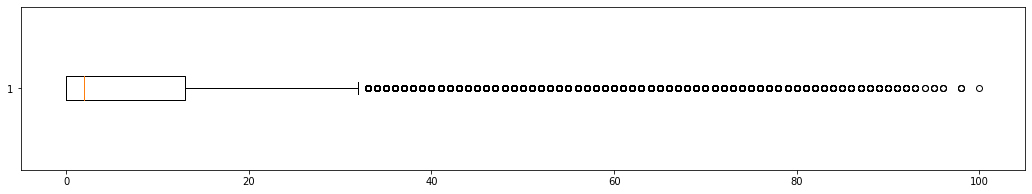

In [ ]:
plt.figure(figsize = (18, 3))
plt.boxplot(artist_df['popularity'], vert= False)
plt.plot()

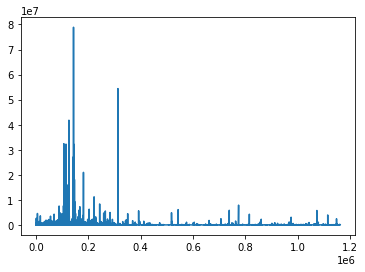

In [ ]:
plt.plot(most_popular["followers"])

In [ ]:
def count_genres(x):
  transform = x.replace("[", "").replace("]","")
  if transform == "":
    return 0
  res = transform.split(",")
  return len(res)

In [ ]:
temp = most_popular.copy()
n_genres = most_popular["genres"].apply(count_genres).value_counts(dropna = False)

n_genres

1     16051
2     11184
0     10812
3      6888
4      4301
5      2718
6      1697
7      1056
8       658
9       426
10      246
11      124
12       75
13       37
14       34
15       22
16       11
17        6
18        2
19        1
21        1
Name: genres, dtype: int64

### Análisis bivariado

Text(0, 0.5, 'followers')

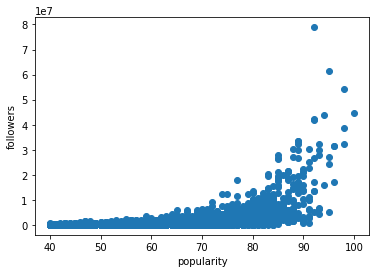

In [ ]:
plt.scatter(most_popular["popularity"], most_popular["followers"])
plt.xlabel("popularity")
plt.ylabel("followers")

In [ ]:
max_pop = most_popular["popularity"].max()
the_best = most_popular[most_popular["popularity"]==max_pop]
the_best

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100


In [ ]:
max_foll = most_popular["followers"].max()
the_best = most_popular[most_popular["followers"]==max_foll]
the_best

,id,followers,genres,name,popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,78900234.0,"['pop', 'uk pop']",Ed Sheeran,92


In [ ]:
artist_df.dtypes

id             object
followers     float64
genres         object
name           object
popularity      int64
dtype: object

In [ ]:
artist_df.to_csv('normal_artist.csv')

TypeError: ignored